In [4]:
pip install jupyter numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn

     |████████████████████████████████| 20.1 MB 5.1 MB/s 
     |████████████████████████████████| 26.1 MB 5.0 MB/s 
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
     |████████████████████████████████| 7.0 MB 4.6 MB/s 
     |████████████████████████████████| 10.1 MB 435 kB/s 
     |████████████████████████████████| 2.1 MB 5.5 MB/s 
     |████████████████████████████████| 540 kB 7.4 MB/s 
     |████████████████████████████████| 90 kB 3.6 MB/s 
     |████████████████████████████████| 67 kB 2.7 MB/s 
     |████████████████████████████████| 294 kB 8.6 MB/s 
     |████████████████████████████████| 509 kB 7.7 MB/s 
     |████████████████████████████████| 3.3 MB 7.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=cf7b3df5988fce00ef1f6817cad4957082d35fc4ae7a9dad2a158036f096c824
  Stored in directory: /home/omorales/snap/code/common/.cache/pip/wheels/c6/d9/a3/bf4db47b6a1f236ee90f8b9e8a3390c941af607a8bf6e70f0f
Successfully built mglea

# Supervised Learning
- Is one of the most commonly used types of machine Learning.
- Is used when we want to to predict a certain outcome from a given input, and we have examples ofinput/output pairs.
- Using the input/output pairs we can build a ML model (training set).
- The goal is to make accurate predictions for new (never-before-seen) data.
- We can say that the a supervised learning model is able to *generalize* from the training set to the test set if it's able to make accurate predictions on unseen data.
- We always want to find the simplest model.
- *Overfitting*: build a model that is too complex for the amount of data we have.
- *Underfitting*: Choosing too simple a model

The two major types of supervised ML problems are *classification* and *regresion*.

### Classification tasks
- The goal is to predict a *class label* (a choice from predefined list of posibilities)
- Often separated into *binary classification* (distinguishing between exactly two classes) and *multiclass classification* (classification between more than two classes).

### Regression tasks
- The goal is to predict a continous number (floating-point number)

### Model Complexity - Dataset Size Relation
- The larger variety of data points the dataset contains, the more complex a model you can use.
- However, simply duplicating the same datapoints or collecting very similar data will not help.
 

## Supervised ML Algorithms


In [5]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import sklearn

/home/omorales/Documents/projects/python/machinelearning/machinelearning/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/omorales/Documents/projects/python/machinelearning/machinelearning/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Sample datasets

/home/omorales/Documents/projects/python/machinelearning/machinelearning/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
X.shape: (26, 2)


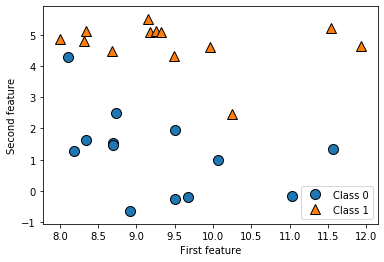

In [8]:
# forge dataset for two-class classification
# generate dataset
X, y = mglearn.datasets.make_forge()
#plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [9]:
# 26 datapoints, with two features

Text(0, 0.5, 'Target')

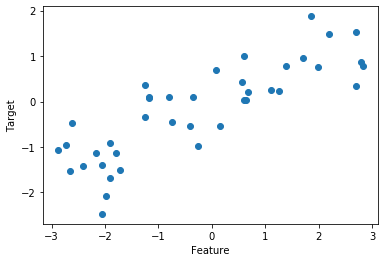

In [10]:
# to illustrate regression algorithms,we will use the wave dataset, it has a single input feature and a continous target variable (or response) that we want to model
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("Feature")
plt.ylabel("Target")

In [11]:
# Wisconsin Breast Cancer dataset
#records clinical measurements of breast cancer tumors, each tumor is labeled as beningn or malignant
# the task is to predict wheter a tumor is malignant based on the measurements of the tissue

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [15]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [16]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
# Boston housing dataset
# predict the median value of homes in several Boston neighborhoodws in 1970s, using info such as crime rate , proximity to Charles River, highway accessibility, etc
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [19]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)
